## **Weight Initialization**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Activation
from sklearn.datasets import make_moons

In [9]:
X,y = make_moons(n_samples=1000, noise=0.25,random_state=32)

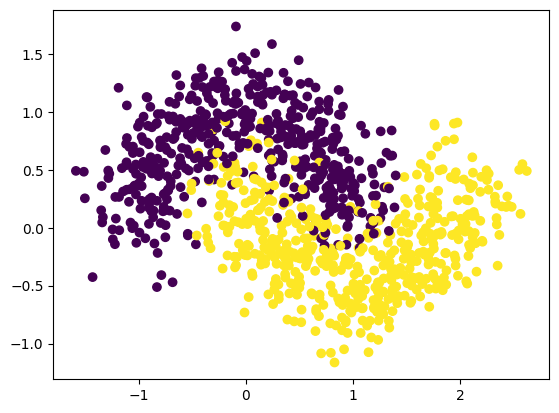

In [10]:
plt.scatter(X[:,0],X[:,1], c=y)

(array([ 20.,  90.,  99., 129., 168., 179., 129.,  93.,  70.,  23.]),
 array([-1.58428466, -1.16406177, -0.74383888, -0.32361599,  0.0966069 ,
         0.51682979,  0.93705268,  1.35727557,  1.77749846,  2.19772135,
         2.61794425]),
 <BarContainer object of 10 artists>)

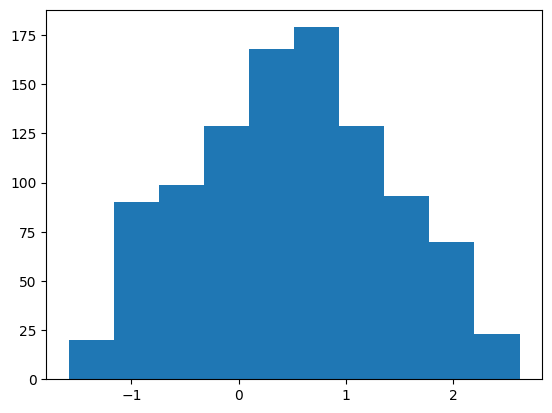

In [ ]:
plt.hist(X[:,0])

## **Small random weights**

In [25]:
X_normal = np.random.randn(1000,2)

<Axes: ylabel='Count'>

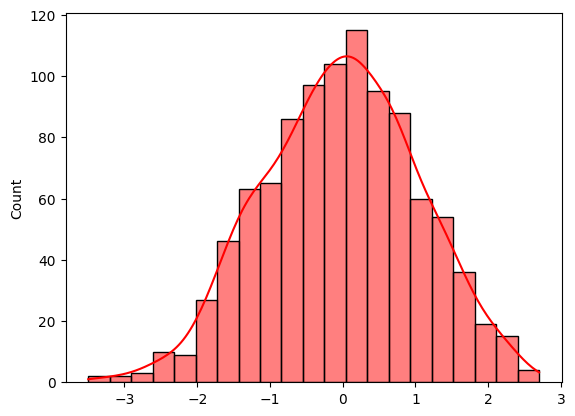

In [27]:
sns.histplot(X_normal[:,0],kde=True,color='red')

In [107]:
sigmoid_values = []
tanh_values = []
relu_values = []
for val in X_normal[:,0] :
    z = val * 0.01 
    sigmoid = 1 / (1 + np.exp(z))
    tanh = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    relu = max(0,z)
    sigmoid_values.append(sigmoid)
    tanh_values.append(tanh)
    relu_values.append(relu)

<Axes: ylabel='Count'>

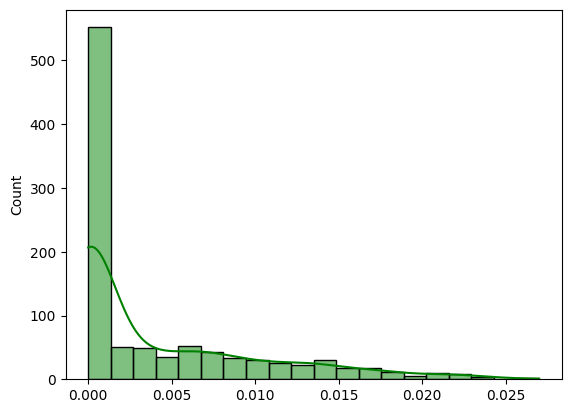

In [108]:
sns.histplot(relu_values,kde=True,color='green')

<Axes: ylabel='Count'>

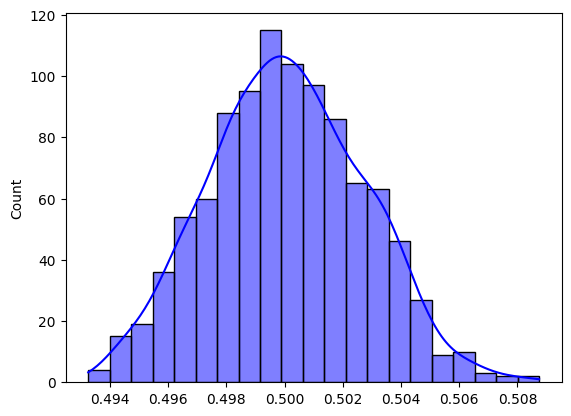

In [102]:
sns.histplot(sigmoid_values, kde=True, color='blue')

<Axes: >

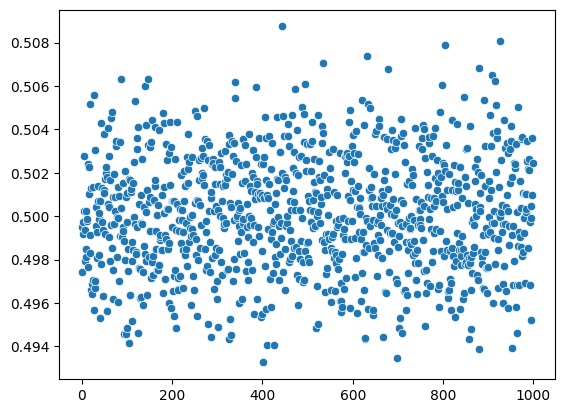

In [105]:
sns.scatterplot(sigmoid_values)

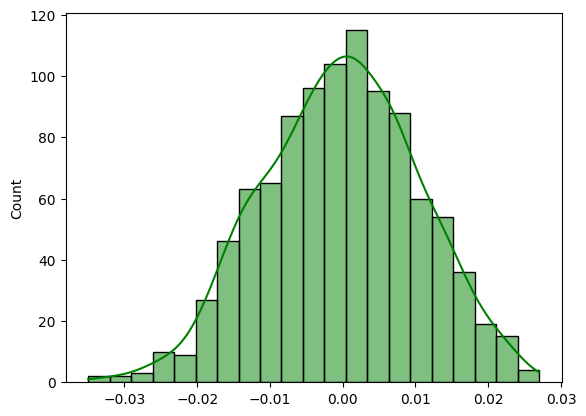

In [103]:
sns.histplot(tanh_values, kde=True, color='green')
plt.show()

<Axes: >

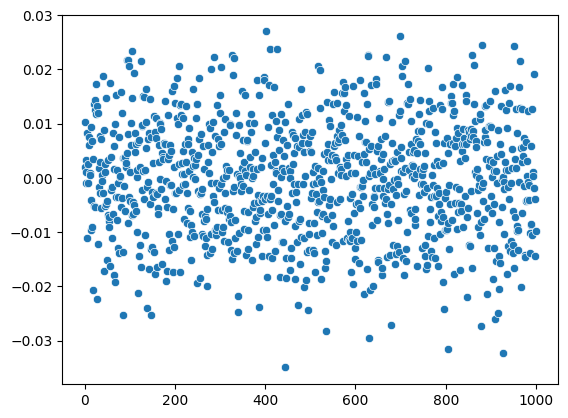

In [106]:
sns.scatterplot(tanh_values)

### **Large random weights**

In [ ]:
sigmoid_values = []
tanh_values = []
relu_values = []
for val in X_normal[:,0] :
    z = val * 3
    sigmoid = 1 / (1 + np.exp(z))
    tanh = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    relu = max(0,z)
    sigmoid_values.append(sigmoid)
    tanh_values.append(tanh)
    relu_values.append(relu)

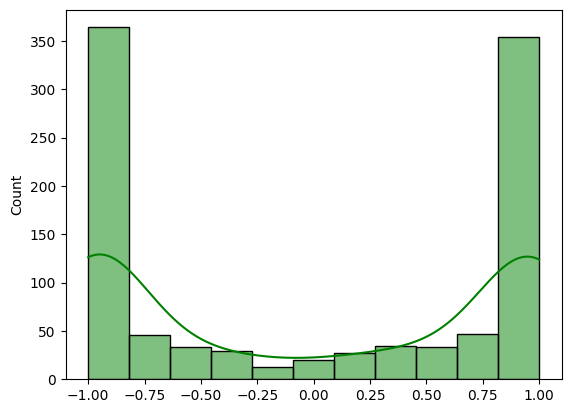

In [110]:
sns.histplot(tanh_values, kde=True, color='green')
plt.show()

<Axes: ylabel='Count'>

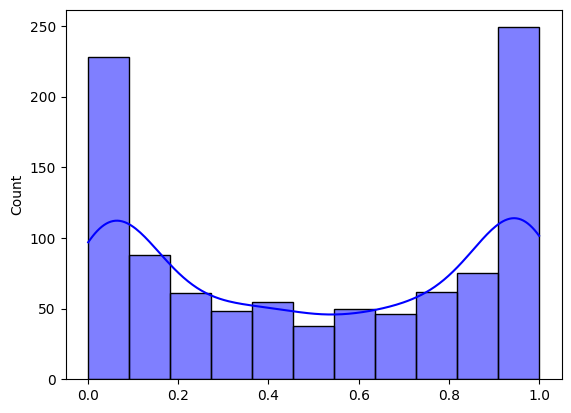

In [111]:
sns.histplot(sigmoid_values, kde=True, color='blue')

<Axes: ylabel='Count'>

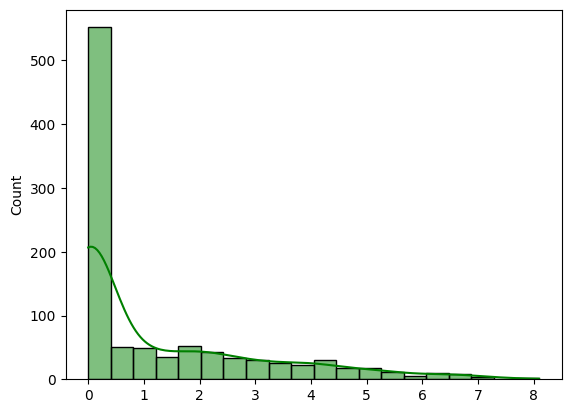

In [112]:
sns.histplot(relu_values,kde=True,color='green')

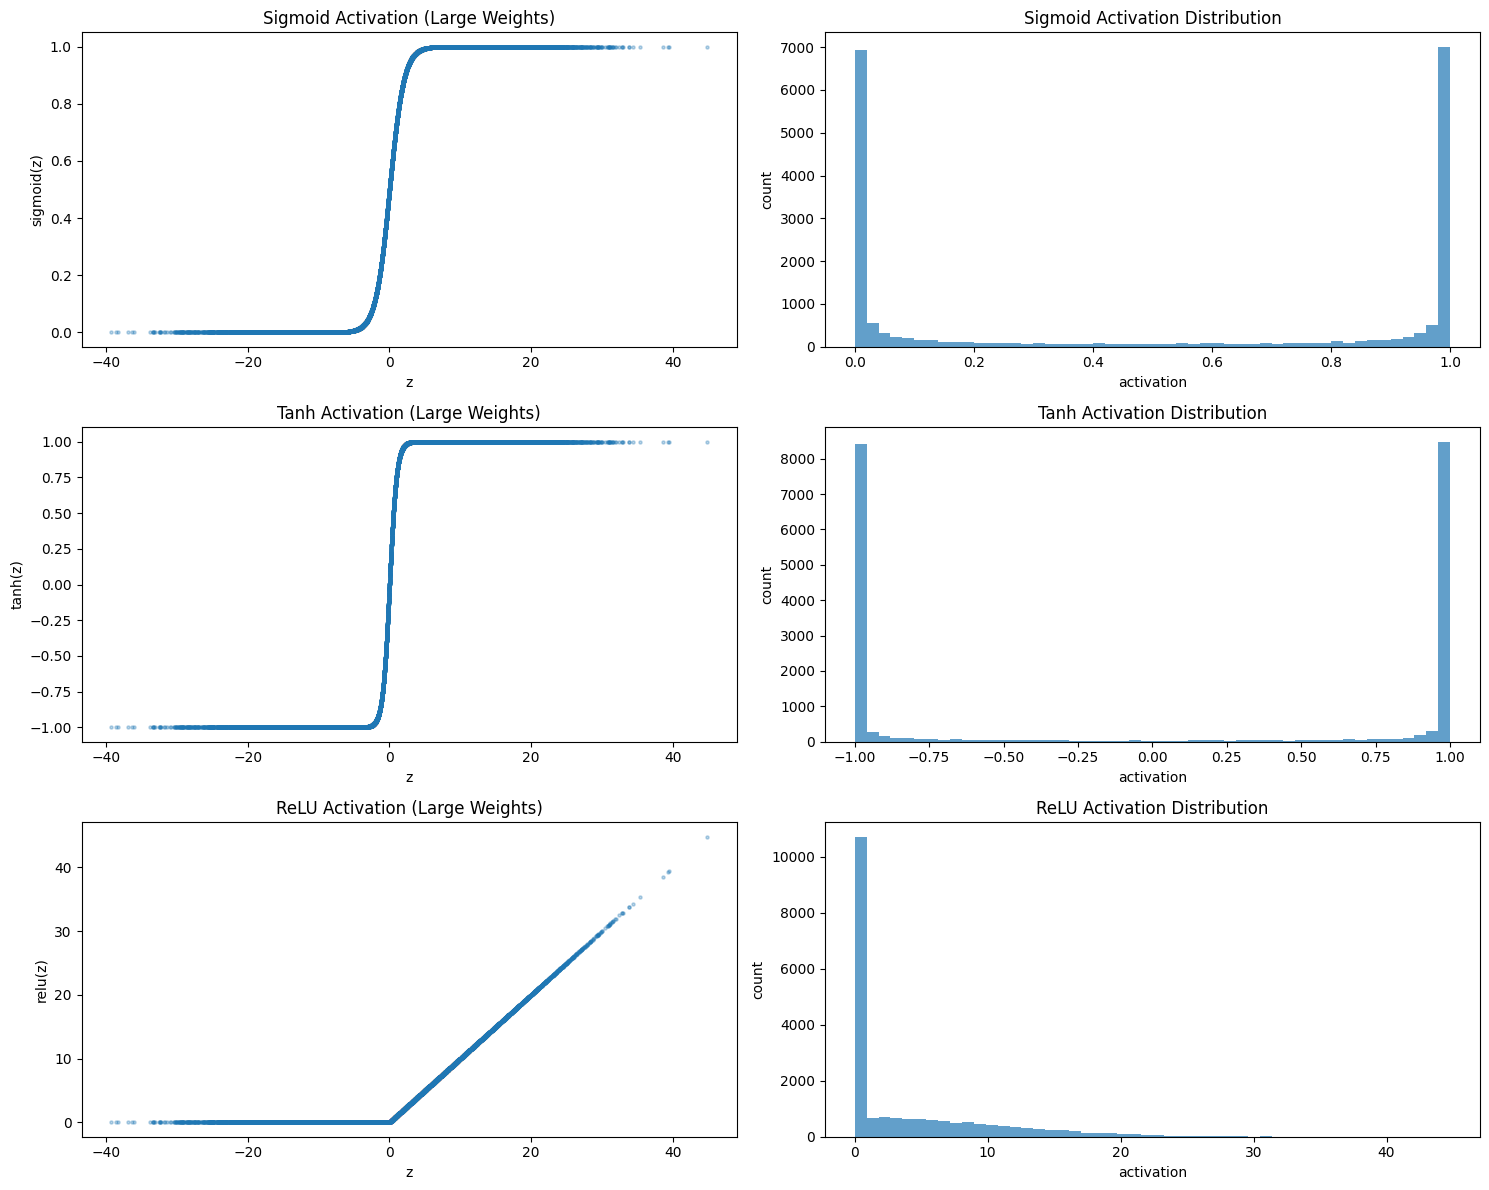

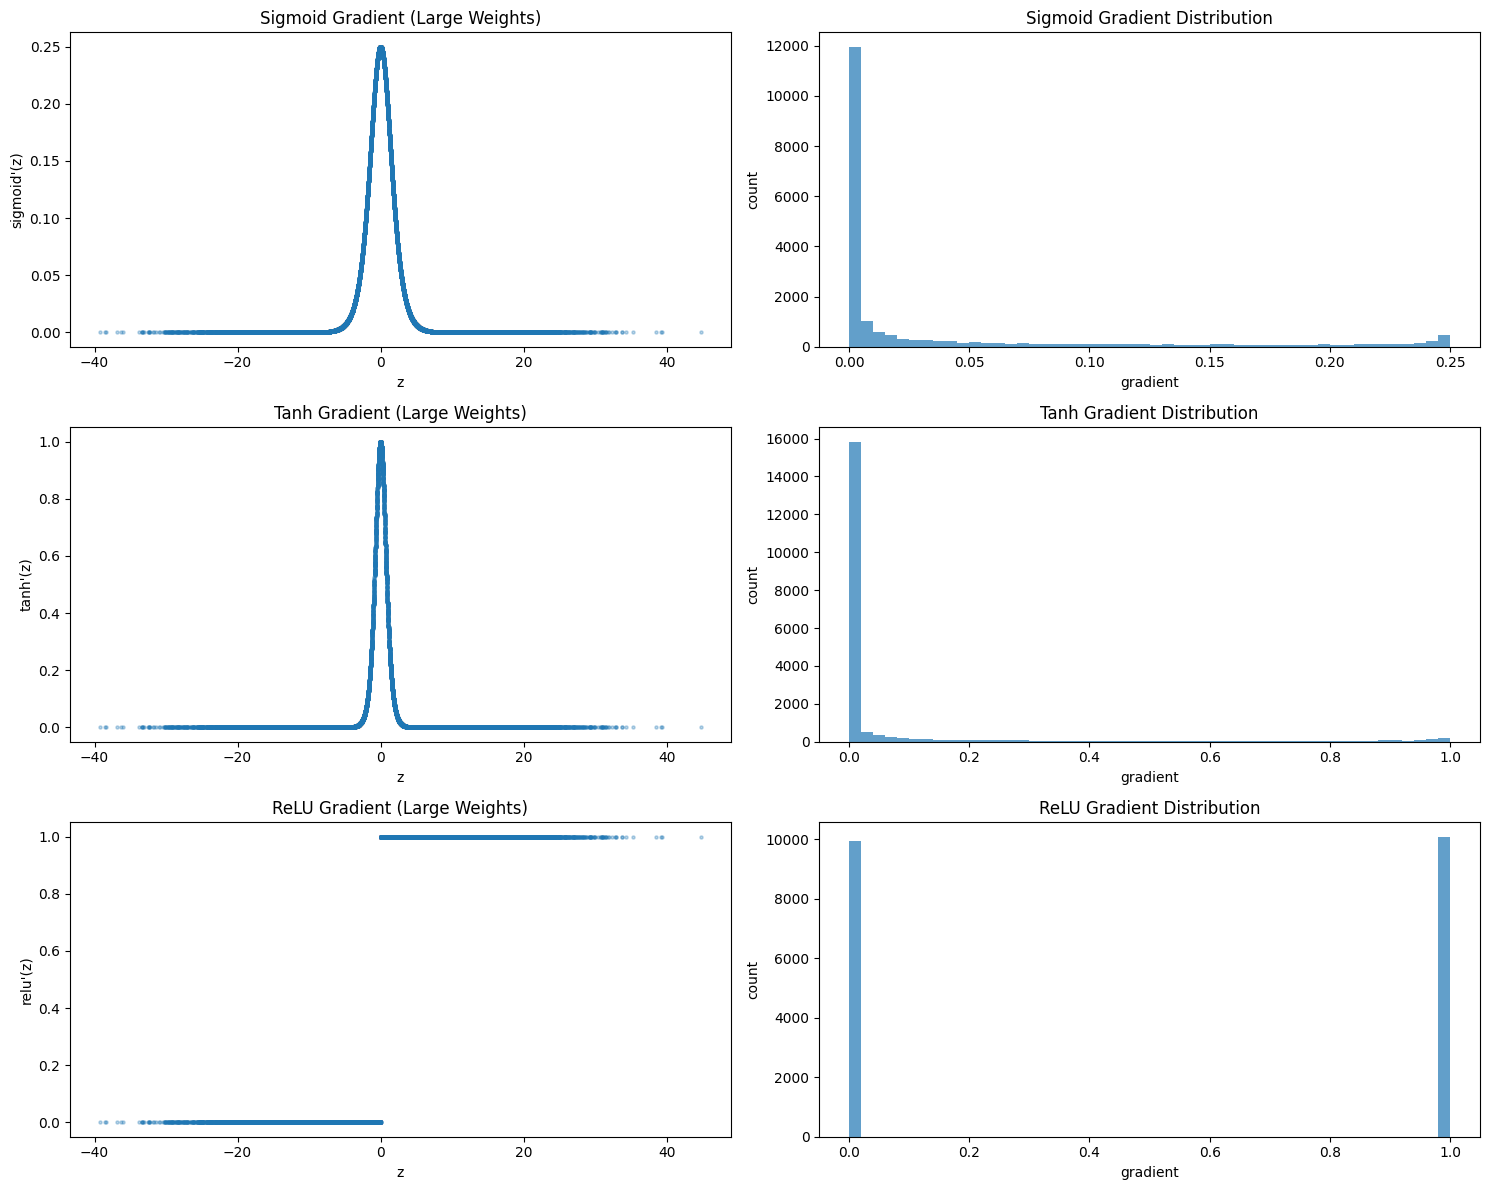

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # sigmoid

# ------- Settings -------
np.random.seed(42)
N = 20000              # number of samples
w = 10.0               # LARGE weight (try 5, 10, 20)

x = np.random.randn(N)
z = w * x              # pre-activation

# -------- ACTIVATIONS --------
sigmoid_vals = expit(z)
tanh_vals = np.tanh(z)
relu_vals = np.maximum(0, z)

# -------- GRADIENTS --------
# sigmoid derivative
sigmoid_grad = sigmoid_vals * (1 - sigmoid_vals)

# tanh derivative
tanh_grad = 1 - tanh_vals**2

# relu derivative (1 if z>0 else 0)
relu_grad = (z > 0).astype(float)

# ========= PLOT ACTIVATION DISTRIBUTIONS =========
plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
plt.scatter(z, sigmoid_vals, s=5, alpha=0.3)
plt.title("Sigmoid Activation (Large Weights)")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")

plt.subplot(3, 2, 2)
plt.hist(sigmoid_vals, bins=50, alpha=0.7)
plt.title("Sigmoid Activation Distribution")
plt.xlabel("activation")
plt.ylabel("count")

plt.subplot(3, 2, 3)
plt.scatter(z, tanh_vals, s=5, alpha=0.3)
plt.title("Tanh Activation (Large Weights)")
plt.xlabel("z")
plt.ylabel("tanh(z)")

plt.subplot(3, 2, 4)
plt.hist(tanh_vals, bins=50, alpha=0.7)
plt.title("Tanh Activation Distribution")
plt.xlabel("activation")
plt.ylabel("count")

plt.subplot(3, 2, 5)
plt.scatter(z, relu_vals, s=5, alpha=0.3)
plt.title("ReLU Activation (Large Weights)")
plt.xlabel("z")
plt.ylabel("relu(z)")

plt.subplot(3, 2, 6)
plt.hist(relu_vals, bins=50, alpha=0.7)
plt.title("ReLU Activation Distribution")
plt.xlabel("activation")
plt.ylabel("count")

plt.tight_layout()
plt.show()

# ========= PLOT GRADIENT DISTRIBUTIONS =========
plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
plt.scatter(z, sigmoid_grad, s=5, alpha=0.3)
plt.title("Sigmoid Gradient (Large Weights)")
plt.xlabel("z")
plt.ylabel("sigmoid'(z)")

plt.subplot(3, 2, 2)
plt.hist(sigmoid_grad, bins=50, alpha=0.7)
plt.title("Sigmoid Gradient Distribution")
plt.xlabel("gradient")
plt.ylabel("count")

plt.subplot(3, 2, 3)
plt.scatter(z, tanh_grad, s=5, alpha=0.3)
plt.title("Tanh Gradient (Large Weights)")
plt.xlabel("z")
plt.ylabel("tanh'(z)")

plt.subplot(3, 2, 4)
plt.hist(tanh_grad, bins=50, alpha=0.7)
plt.title("Tanh Gradient Distribution")
plt.xlabel("gradient")
plt.ylabel("count")

plt.subplot(3, 2, 5)
plt.scatter(z, relu_grad, s=5, alpha=0.3)
plt.title("ReLU Gradient (Large Weights)")
plt.xlabel("z")
plt.ylabel("relu'(z)")

plt.subplot(3, 2, 6)
plt.hist(relu_grad, bins=50, alpha=0.7)
plt.title("ReLU Gradient Distribution")
plt.xlabel("gradient")
plt.ylabel("count")

plt.tight_layout()
plt.show()


### **Xavier Initialization**

In [114]:
sigmoid_values = []
tanh_values = []
relu_values = []
for val in X_normal[:,0] :
    z = val * np.sqrt(1/2)
    sigmoid = 1 / (1 + np.exp(z))
    tanh = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    relu = max(0,z)
    sigmoid_values.append(sigmoid)
    tanh_values.append(tanh)
    relu_values.append(relu)

<Axes: ylabel='Count'>

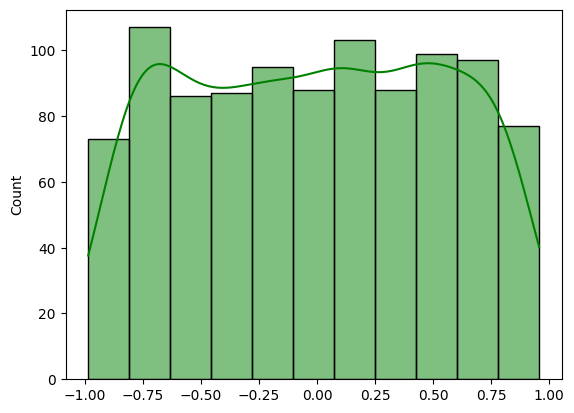

In [115]:
sns.histplot(tanh_values, kde=True, color='green')

<Axes: ylabel='Count'>

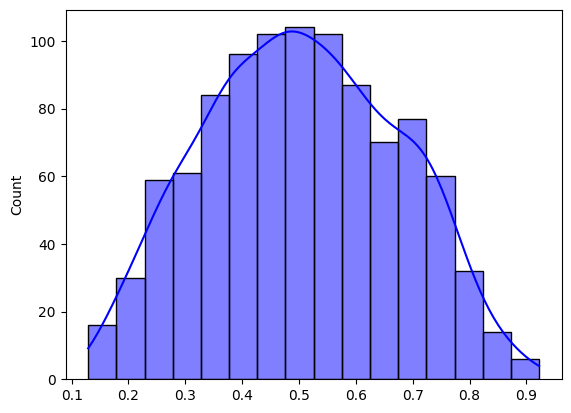

In [116]:
sns.histplot(sigmoid_values, kde=True, color='blue')

<Axes: ylabel='Count'>

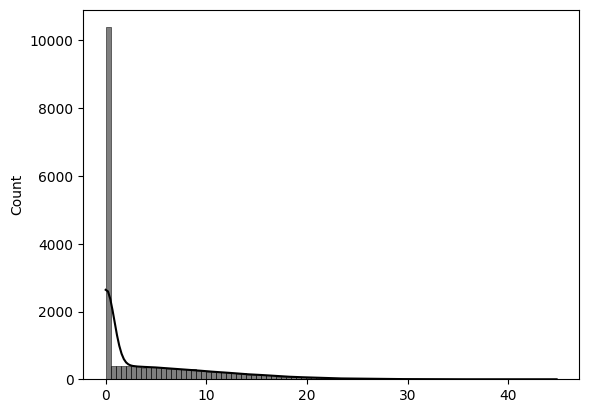

In [118]:
sns.histplot(relu_vals,kde=True,color='black')

## **Zero weight initialization**

In [33]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=36)

### **Tanh Activation**

In [ ]:
input_layer = Input(shape=(2,))

hidden_layer_1 = Dense(8, name="hidden_layer_1")(input_layer)
activation_layer_1 = Activation('tanh',name='activation_layer_1')(hidden_layer_1)

hidden_layer_2 = Dense(4,name='hidden_layer_2')(activation_layer_1)
activation_layer_2 = Activation('tanh',name='activation_layer_2')(hidden_layer_2)

output_layer = Dense(1,activation='sigmoid',name='output_layer')(activation_layer_2)

zero_weights_model = Model(input_layer,output_layer)

In [ ]:
zero_weights_model.get_weights()

[array([[ 0.1216749 , -0.31426862, -0.752617  ,  0.31646228, -0.43322375,
         -0.71932214, -0.05503577, -0.572365  ],
        [-0.6588413 ,  0.22168368, -0.49358585, -0.757388  ,  0.11349291,
          0.0223226 , -0.16610718,  0.416183  ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.25119776, -0.02977741,  0.08580256,  0.6092492 ],
        [-0.6894838 ,  0.21584815, -0.48671734,  0.00962162],
        [-0.5438729 , -0.281796  , -0.26205274,  0.3364398 ],
        [ 0.54691845,  0.4371422 ,  0.5948524 ,  0.597876  ],
        [ 0.69243664, -0.02326405, -0.57950246, -0.64747083],
        [ 0.6059409 , -0.25645262,  0.12830395,  0.51102763],
        [-0.40598726, -0.11026543,  0.609569  ,  0.6355247 ],
        [ 0.31931502, -0.28949103,  0.22500193, -0.2125265 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-1.0311908 ],
        [-0.67667305],
        [-0.06003463],
        [ 0.29339135]], dtype=float32),
 array([0.

In [38]:
initial_weights = zero_weights_model.get_weights()

In [39]:
initial_weights[0] = np.zeros((2,8))
initial_weights[2] = np.zeros((8,4))
initial_weights[4] = np.zeros((4,1))

In [41]:
zero_weights_model.set_weights(initial_weights)

In [42]:
zero_weights_model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [40]:
initial_weights

[array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.]]),
 array([0.], dtype=float32)]

In [35]:
zero_weights_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_layer_1 (Activation) │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_layer_2 (Activation) │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
zero_weights_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
zero_weights_model_hist = zero_weights_model.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_test,y_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.5025 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6932
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6932
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6932
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6933
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6933
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6933
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6933
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6934


In [44]:
zero_weights_model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.01930012], dtype=float32)]

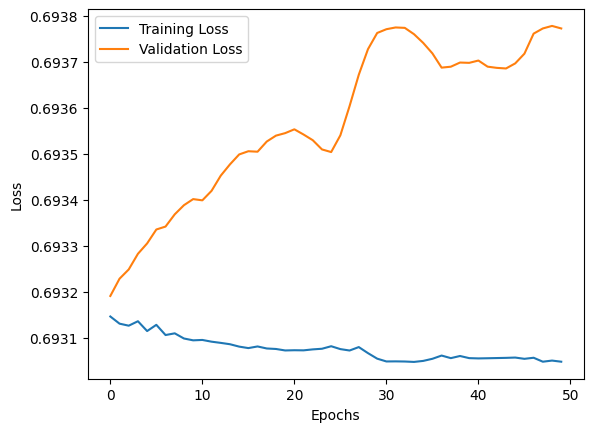

In [45]:
plt.plot(zero_weights_model_hist.history['loss'], label='Training Loss')
plt.plot(zero_weights_model_hist.history['val_loss'], label='Validation Loss')  
plt.xlabel('Epochs')
plt.ylabel('Loss')  
plt.legend()
plt.show()  

In [46]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 694us/step


<Axes: >

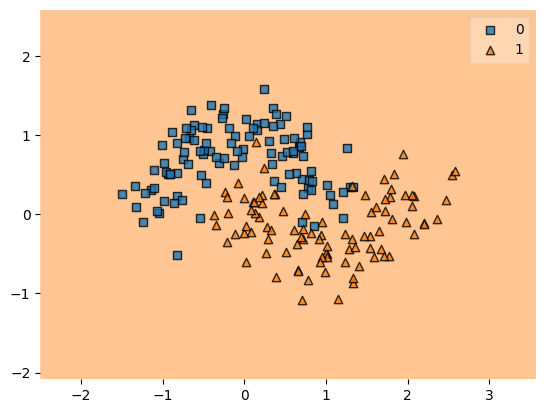

In [47]:
plot_decision_regions(X_test, y_test,clf=zero_weights_model)

### **Sigmoid Activation**

In [55]:
input_layer = Input(shape=(2,))

hidden_layer_1 = Dense(8, name="hidden_layer_1")(input_layer)
activation_layer_1 = Activation('sigmoid',name='activation_layer_1')(hidden_layer_1)

hidden_layer_2 = Dense(4,name='hidden_layer_2')(activation_layer_1)
activation_layer_2 = Activation('sigmoid',name='activation_layer_2')(hidden_layer_2)

output_layer = Dense(1,activation='sigmoid',name='output_layer')(activation_layer_2)

zero_weights_sigmoid_model = Model(input_layer,output_layer)

In [56]:
zero_weights_sigmoid_model.set_weights(initial_weights)

In [57]:
zero_weights_sigmoid_model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [58]:
zero_weights_sigmoid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
zero_weights_sigmoid_model_hist = zero_weights_sigmoid_model.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_test,y_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.4975 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6933
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6935
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6936
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6936
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6936
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6936
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6936
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6936


In [63]:
zero_weights_sigmoid_model.get_weights()

[array([[ 0.26721534,  0.26721534,  0.26721534,  0.26721534,  0.26721534,
          0.26721534,  0.26721528,  0.26721528],
        [-0.26268706, -0.26268706, -0.26268706, -0.26268706, -0.26268706,
         -0.26268706, -0.26268706, -0.26268706]], dtype=float32),
 array([-0.01645442, -0.01645442, -0.01645442, -0.01645442, -0.01645442,
        -0.01645442, -0.01645443, -0.01645443], dtype=float32),
 array([[0.09862176, 0.09862176, 0.09862176, 0.09862176],
        [0.09862176, 0.09862176, 0.09862176, 0.09862176],
        [0.09862176, 0.09862176, 0.09862176, 0.09862176],
        [0.09862176, 0.09862176, 0.09862176, 0.09862176],
        [0.09862176, 0.09862176, 0.09862176, 0.09862176],
        [0.09862176, 0.09862176, 0.09862176, 0.09862176],
        [0.09862177, 0.09862177, 0.09862177, 0.09862177],
        [0.09862177, 0.09862177, 0.09862177, 0.09862177]], dtype=float32),
 array([0.00173187, 0.00173187, 0.00173187, 0.00173187], dtype=float32),
 array([[0.01809665],
        [0.01809665],
  

- same values of weights for a neuron
- hence results in linear model

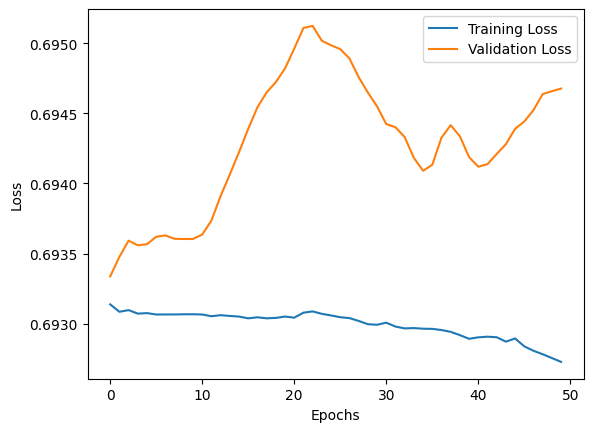

In [60]:
plt.plot(zero_weights_sigmoid_model_hist.history['loss'], label='Training Loss')
plt.plot(zero_weights_sigmoid_model_hist.history['val_loss'], label='Validation Loss')  
plt.xlabel('Epochs')
plt.ylabel('Loss')  
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 701us/step


<Axes: >

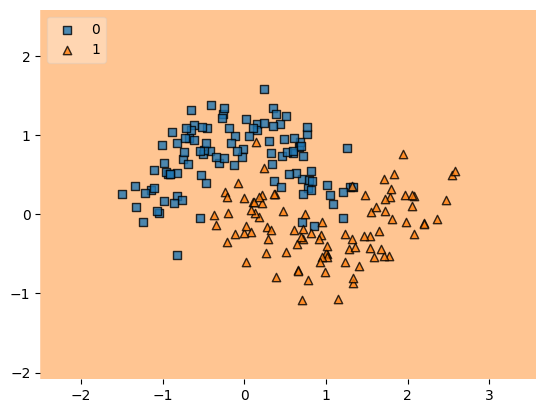

In [62]:
plot_decision_regions(X=X_test, y=y_test, clf=zero_weights_sigmoid_model, legend=2)

## **Constant non zero value**

In [64]:
input_layer = Input(shape=(2,))

hidden_layer_1 = Dense(8, name="hidden_layer_1")(input_layer)
activation_layer_1 = Activation('tanh',name='activation_layer_1')(hidden_layer_1)

hidden_layer_2 = Dense(4,name='hidden_layer_2')(activation_layer_1)
activation_layer_2 = Activation('tanh',name='activation_layer_2')(hidden_layer_2)

output_layer = Dense(1,activation='sigmoid',name='output_layer')(activation_layer_2)

constant_non_zero_weights_model = Model(input_layer,output_layer)

In [65]:
initial_weights

[array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.]]),
 array([0.], dtype=float32)]

In [68]:
initial_weights[0] = np.full((2,8),0.5)
initial_weights[1] = np.full((8,),0.5)
initial_weights[2] = np.full((8,4),0.5)
initial_weights[3] = np.full((4,),0.5)
initial_weights[4] = np.full((4,1),0.5)
initial_weights[5] = np.full((1,),0.5)


In [69]:
initial_weights

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([[0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5]]),
 array([0.5, 0.5, 0.5, 0.5]),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5]]),
 array([0.5])]

In [70]:
constant_non_zero_weights_model.set_weights(initial_weights)

In [71]:
constant_non_zero_weights_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
constant_non_zero_weights_model_hist = constant_non_zero_weights_model.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_test,y_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.5088 - loss: 1.2556 - val_accuracy: 0.4700 - val_loss: 1.3189
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5088 - loss: 1.2451 - val_accuracy: 0.4700 - val_loss: 1.3072
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5100 - loss: 1.2345 - val_accuracy: 0.4750 - val_loss: 1.2955
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5100 - loss: 1.2241 - val_accuracy: 0.4750 - val_loss: 1.2840
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5100 - loss: 1.2139 - val_accuracy: 0.4800 - val_loss: 1.2725
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5113 - loss: 1.2035 - val_accuracy: 0.4800 - val_loss: 1.2611
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5113 - loss: 1.1933 - val_accuracy: 0.4850 - val_loss: 1.2498
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5113 - loss: 1.1829 - val_accuracy: 0.4900 - val_loss: 1.2386


In [73]:
constant_non_zero_weights_model.get_weights()

[array([[0.68613505, 0.68613505, 0.68613505, 0.68613505, 0.68613505,
         0.68613505, 0.68613505, 0.68613505],
        [0.2603321 , 0.2603321 , 0.2603321 , 0.2603321 , 0.2603321 ,
         0.2603321 , 0.2603321 , 0.2603321 ]], dtype=float32),
 array([0.29994154, 0.29994154, 0.29994154, 0.29994154, 0.29994154,
        0.29994154, 0.29994154, 0.29994154], dtype=float32),
 array([[0.3322112, 0.3322112, 0.3322112, 0.3322112],
        [0.3322112, 0.3322112, 0.3322112, 0.3322112],
        [0.3322112, 0.3322112, 0.3322112, 0.3322112],
        [0.3322112, 0.3322112, 0.3322112, 0.3322112],
        [0.3322112, 0.3322112, 0.3322112, 0.3322112],
        [0.3322112, 0.3322112, 0.3322112, 0.3322112],
        [0.3322112, 0.3322112, 0.3322112, 0.3322112],
        [0.3322112, 0.3322112, 0.3322112, 0.3322112]], dtype=float32),
 array([0.2824377, 0.2824377, 0.2824377, 0.2824377], dtype=float32),
 array([[0.32887062],
        [0.32887062],
        [0.32887062],
        [0.32887062]], dtype=float32),
 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 910us/step


<Axes: >

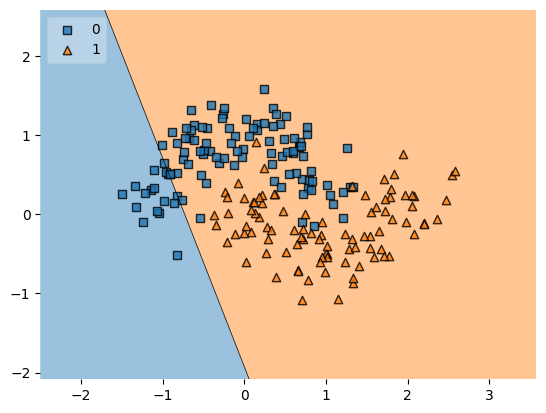

In [75]:
plot_decision_regions(X=X_test, y=y_test, clf=constant_non_zero_weights_model, legend=2)

## **Random small values**

In [89]:
input_layer = Input(shape=(2,))

hidden_layer_1 = Dense(64, name="hidden_layer_1")(input_layer)
activation_layer_1 = Activation('tanh',name='activation_layer_1')(hidden_layer_1)

hidden_layer_2 = Dense(32,name='hidden_layer_2')(activation_layer_1)
activation_layer_2 = Activation('tanh',name='activation_layer_2')(hidden_layer_2)

hidden_layer_3 = Dense(16,name='hidden_layer_3')(activation_layer_2)
activation_layer_3 = Activation('tanh',name='activation_layer_3')(hidden_layer_3)

hidden_layer_4 = Dense(8,name='hidden_layer_4')(activation_layer_3)
activation_layer_4 = Activation('tanh',name='activation_layer_4')(hidden_layer_4)

hidden_layer_5 = Dense(4,name='hidden_layer_5')(activation_layer_4)
activation_layer_5 = Activation('tanh',name='activation_layer_5')(hidden_layer_5)


output_layer = Dense(1,activation='sigmoid',name='output_layer')(activation_layer_5)

random_small_weights_model = Model(input_layer,output_layer)

In [90]:
random_small_weights_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_layer_1 (Activation) │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_layer_2 (Activation) │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_layer_3 (Activation) │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_layer_4 (Activation) │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_layer_5 (Activation) │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,977 (11.63 KB)

 Trainable params: 2,977 (11.63 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
random_small_weights_model.get_weights()

[array([[-0.28556526, -0.09198485, -0.06207736,  0.23551077, -0.02848688,
         -0.09557116, -0.18178487,  0.02982584, -0.0974026 , -0.19249946,
         -0.21101958, -0.00975585,  0.0725939 ,  0.01496002,  0.12318829,
         -0.10337387, -0.2658561 ,  0.2495246 , -0.2665861 , -0.264942  ,
          0.04340371,  0.05857536,  0.29015565, -0.28847542, -0.28903425,
          0.17879945,  0.287583  ,  0.18294516,  0.11391509,  0.23061007,
          0.06279868,  0.25300384,  0.03649065,  0.11354882, -0.19869919,
          0.21103418, -0.04206023,  0.14219937, -0.00544018, -0.01642132,
          0.14534014,  0.01441652, -0.22197434,  0.0161486 ,  0.18071154,
         -0.07487658, -0.00690076,  0.20253259, -0.20324174,  0.0853121 ,
          0.15810019, -0.02882943,  0.13247493, -0.13888925, -0.25680724,
          0.03689694,  0.12076673, -0.09692629, -0.0643926 , -0.16627556,
          0.28569633, -0.2687968 , -0.11282422, -0.0256581 ],
        [-0.13990285,  0.14645034,  0.00501463,  0

In [92]:
initial_weights = random_small_weights_model.get_weights()

In [93]:
initial_weights[0] = np.random.randn(2,64) * 0.001
initial_weights[1] = np.random.randn(64,) * 0.001
initial_weights[2] = np.random.randn(64,32) * 0.001  
initial_weights[3] = np.random.randn(32,) * 0.001
initial_weights[4] = np.random.randn(32,16) * 0.001
initial_weights[5] = np.random.randn(16,) * 0.001
initial_weights[6] = np.random.randn(16,8) * 0.001
initial_weights[7] = np.random.randn(8,) * 0.001
initial_weights[8] = np.random.randn(8,4) * 0.001
initial_weights[9] = np.random.randn(4,) * 0.001


In [94]:
initial_weights

[array([[-9.96452162e-04, -1.79094858e-03, -9.98920671e-05,
         -5.47650142e-04, -3.25503506e-04,  1.69242595e-03,
          6.61279765e-04, -6.18976484e-05,  3.09968279e-05,
          1.85758086e-03, -5.91412913e-04,  6.80066126e-04,
          1.63781267e-03,  7.32905672e-04, -1.17497560e-03,
          7.24934669e-04, -6.45130623e-04,  5.27629900e-04,
         -2.70283913e-03, -7.44146428e-06,  7.42677705e-04,
         -3.65656215e-04,  1.25246815e-03,  6.99883922e-04,
          9.33469500e-04,  6.78304035e-04,  1.16392065e-03,
          1.84119671e-03, -9.88538856e-05,  4.97095472e-04,
          6.44372801e-04,  5.31099336e-04, -8.01953962e-04,
          9.02062639e-04,  1.08679383e-03,  8.60212675e-04,
          3.70074324e-05, -2.61931977e-04, -1.01472482e-03,
         -6.58481697e-04, -8.92273499e-04,  4.97875850e-05,
          3.61535345e-04, -2.35161774e-03,  1.71934932e-03,
          1.20530974e-03,  3.88753464e-04,  6.53870745e-04,
         -5.49412433e-04, -1.16696386e-0

In [95]:
random_small_weights_model.set_weights(initial_weights)

In [96]:
random_small_weights_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [97]:
random_small_weights_model_hist = random_small_weights_model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=(X_test,y_test))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.5075 - loss: 0.6932 - val_accuracy: 0.4700 - val_loss: 0.6935
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6936
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5075 - loss: 0.6932 - val_accuracy: 0.4700 - val_loss: 0.6938
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6938
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6937
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6935
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss: 0.6935
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.4700 - val_loss:

In [98]:
random_small_weights_model.get_weights()

[array([[-0.04741115, -0.05661462,  0.04722364, -0.02910464,  0.01503045,
          0.04268166, -0.02326926, -0.04171546,  0.03589699,  0.04395817,
          0.02539185, -0.05642394,  0.04689211,  0.05169025, -0.06098506,
         -0.03386712,  0.03446315, -0.03275948, -0.06842213,  0.04122199,
          0.03700969, -0.04235843,  0.0299897 , -0.02422821,  0.04908034,
         -0.03670271,  0.01703825,  0.05111087,  0.02877861, -0.02431013,
          0.02920656, -0.04106917,  0.01689228,  0.04315045,  0.04710986,
          0.05010659,  0.02226166, -0.04416003, -0.03533789, -0.05638129,
         -0.03071743, -0.023259  ,  0.03526573, -0.03842728,  0.03205423,
          0.0370569 ,  0.04679328, -0.0137316 , -0.03847319, -0.0188941 ,
         -0.03742546,  0.00602698, -0.01723241, -0.05866945, -0.03004373,
         -0.03465504,  0.04539877,  0.02884024,  0.05385451,  0.05552591,
          0.05090772,  0.02376657, -0.01893724, -0.03795338],
        [ 0.14259529,  0.14851324, -0.14123437,  0

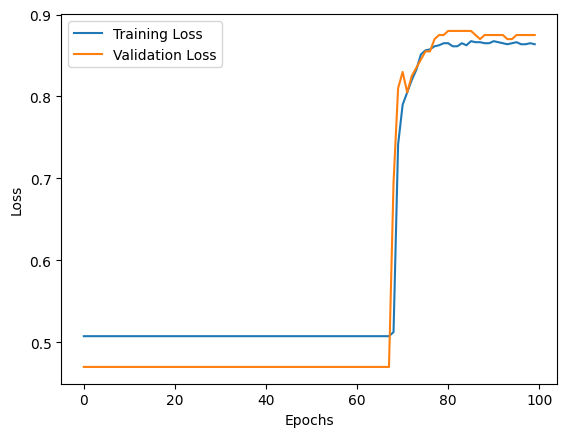

In [99]:
plt.plot(random_small_weights_model_hist.history['accuracy'], label='Training Loss')
plt.plot(random_small_weights_model_hist.history['val_accuracy'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')  
plt.legend()
plt.show() 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 802us/step


<Axes: >

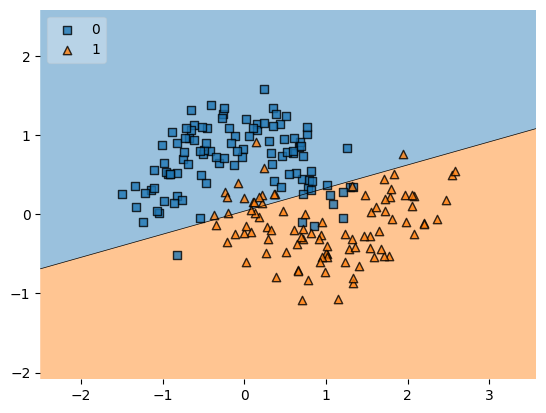

In [100]:
plot_decision_regions(X=X_test, y=y_test, clf=random_small_weights_model, legend=2)